In [2]:
pip install pywget

Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
from pywget import wget

url = "https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD"
current_directory = os.getcwd()
data_directory = os.path.join(current_directory, r'data')
if not os.path.exists(data_directory):
    os.makedirs(data_directory)
wget.download(url, data_directory)

'K:\\OneDrive - nyu.edu\\NYU\\CS6513_BigData\\Juliana\\Fall 2021\\hw\\eval_group_project\\new\\Make-traffic-safer-in-New-York-City\\data\\Motor_Vehicle_Collisions_-_Crashes.csv'

In [6]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
import csv

# ds = stream(os.path.join('data', 'Motor_Vehicle_Collisions_-_Crashes.csv'))

In [7]:
mv_collision = pd.read_csv('data\Motor_Vehicle_Collisions_-_Crashes.csv', dtype=str)

mv_collision.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,04/13/2021,16:00,BROOKLYN,11222,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
4,04/12/2021,8:25,NaN,NaN,0,0,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [8]:
import os

from openclean.pipeline import stream

ds = stream(os.path.join('data', 'Motor_Vehicle_Collisions_-_Crashes.csv'))

In [9]:
ds.columns

['CRASH DATE',
 'CRASH TIME',
 'BOROUGH',
 'ZIP CODE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'ON STREET NAME',
 'CROSS STREET NAME',
 'OFF STREET NAME',
 'NUMBER OF PERSONS INJURED',
 'NUMBER OF PERSONS KILLED',
 'NUMBER OF PEDESTRIANS INJURED',
 'NUMBER OF PEDESTRIANS KILLED',
 'NUMBER OF CYCLIST INJURED',
 'NUMBER OF CYCLIST KILLED',
 'NUMBER OF MOTORIST INJURED',
 'NUMBER OF MOTORIST KILLED',
 'CONTRIBUTING FACTOR VEHICLE 1',
 'CONTRIBUTING FACTOR VEHICLE 2',
 'CONTRIBUTING FACTOR VEHICLE 3',
 'CONTRIBUTING FACTOR VEHICLE 4',
 'CONTRIBUTING FACTOR VEHICLE 5',
 'COLLISION_ID',
 'VEHICLE TYPE CODE 1',
 'VEHICLE TYPE CODE 2',
 'VEHICLE TYPE CODE 3',
 'VEHICLE TYPE CODE 4',
 'VEHICLE TYPE CODE 5']

In [10]:
ds.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,,,,,,BRONX WHITESTONE BRIDGE,,,...,Unspecified,,,,4407480,Sedan,Sedan,,,
1,04/13/2021,21:35,BROOKLYN,11217,40.68358,-73.97617,"(40.68358, -73.97617)",,,620 ATLANTIC AVENUE,...,,,,,4407147,Sedan,,,,
2,04/15/2021,16:15,,,,,,HUTCHINSON RIVER PARKWAY,,,...,,,,,4407665,Station Wagon/Sport Utility Vehicle,,,,
3,04/13/2021,16:00,BROOKLYN,11222,,,,VANDERVORT AVENUE,ANTHONY STREET,,...,Unspecified,,,,4407811,Sedan,,,,
4,04/12/2021,8:25,,,0,0,"(0.0, 0.0)",EDSON AVENUE,,,...,Unspecified,,,,4406885,Station Wagon/Sport Utility Vehicle,Sedan,,,
5,04/13/2021,17:11,,,,,,VERRAZANO BRIDGE UPPER,,,...,Unspecified,,,,4407883,Sedan,Box Truck,,,
6,04/13/2021,17:30,QUEENS,11106,,,,33 st,31ave,,...,Unspecified,,,,4408019,Sedan,Sedan,,,
7,04/16/2021,23:30,,,,,,SHORE PARKWAY,,,...,,,,,4408060,Sedan,,,,
8,04/11/2021,17:00,,,,,,GOWANUS RAMP,,,...,Other Vehicular,,,,4406314,Sedan,Sedan,,,
9,04/16/2021,21:15,,,,,,BRONX RIVER PARKWAY RAMP,,,...,Unspecified,,,,4408149,Station Wagon/Sport Utility Vehicle,Sedan,,,


In [11]:
ds.count()

1850329

In [12]:
# Get basic profile information for all columns in the dataset.

profiles = ds.profile()
profiles

[{'column': 'CRASH DATE',
  'stats': {'totalValueCount': 1850329,
   'emptyValueCount': 0,
   'datatypes': defaultdict(collections.Counter,
               {'total': Counter({'date': 1850329})}),
   'minmaxValues': {'date': {'minimum': datetime.datetime(2012, 7, 1, 0, 0),
     'maximum': datetime.datetime(2021, 12, 14, 0, 0)}}}},
 {'column': 'CRASH TIME',
  'stats': {'totalValueCount': 1850329,
   'emptyValueCount': 0,
   'datatypes': defaultdict(collections.Counter,
               {'total': Counter({'str': 1850329})}),
   'minmaxValues': {'str': {'minimum': '0:00', 'maximum': '9:59'}}}},
 {'column': 'BOROUGH',
  'stats': {'totalValueCount': 1850329,
   'emptyValueCount': 571875,
   'datatypes': defaultdict(collections.Counter,
               {'total': Counter({'str': 1278454})}),
   'minmaxValues': {'str': {'minimum': 'BRONX', 'maximum': 'STATEN ISLAND'}}}},
 {'column': 'ZIP CODE',
  'stats': {'totalValueCount': 1850329,
   'emptyValueCount': 572098,
   'datatypes': defaultdict(collect

In [13]:
# Print number of empty cells for each column

profiles.stats()['empty']

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           571875
ZIP CODE                          572098
LATITUDE                          215848
LONGITUDE                         215848
LOCATION                          215848
ON STREET NAME                    378786
CROSS STREET NAME                 666933
OFF STREET NAME                  1563912
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       5376
CONTRIBUTING FACTOR VEHICLE 2     268896
CONTRIBUTING FACTOR VEHICLE 3    1723269
CONTRIBUTING FACTOR VEHICLE 4    1822495
CONTRIBUTING FACTOR VEHICLE 5    1842931
COLLISION_ID                           0
VEHICLE TYPE COD

In [15]:

# How many records are there for 'BROOKLYN'
from openclean.function.eval.base import Col

ds.filter(Col('BOROUGH') == 'BROOKLYN').count()

402620

In [19]:
# Print column type information (as data frame)

profiles.types()

,date,float,int,str
CRASH DATE,1850329,0,0,0
CRASH TIME,0,0,0,1850329
BOROUGH,0,0,0,1278454
ZIP CODE,0,0,1278189,42
LATITUDE,0,1632349,2132,0
LONGITUDE,0,1632342,2139,0
LOCATION,0,0,0,1634481
ON STREET NAME,103,0,19,1471421
CROSS STREET NAME,2,1,52,1183341
OFF STREET NAME,31,0,1,286385


In [20]:
# Get a quick look at the columns that contain values of
# different (raw) data types.

profiles.multitype_columns().types()

,date,float,int,str
ZIP CODE,0,0,1278189,42
LATITUDE,0,1632349,2132,0
LONGITUDE,0,1632342,2139,0
ON STREET NAME,103,0,19,1471421
CROSS STREET NAME,2,1,52,1183341
OFF STREET NAME,31,0,1,286385
CONTRIBUTING FACTOR VEHICLE 1,0,0,111,1844842
CONTRIBUTING FACTOR VEHICLE 2,0,0,27,1581406
CONTRIBUTING FACTOR VEHICLE 3,0,0,4,127056
VEHICLE TYPE CODE 1,0,0,14,1840059


In [21]:
# There are some invalid datatype in 'ON STREET NAME' field
profiles.minmax('ON STREET NAME')

,min,max
str,,estfarms road
date,0103-12-18 00:00:00,2069-12-18 00:00:00
int,12,2430


In [22]:
# Which values are identified as 'date' in column 'BUILDING'

from openclean.function.eval.datatype import IsDatetime

ds.select('ON STREET NAME').filter(IsDatetime('ON STREET NAME')).distinct()

Counter({'158 st                          ': 1,
         '47th St                         ': 1,
         '34                              ': 1,
         '53th St                         ': 1,
         '78 st                           ': 1,
         '31                              ': 1,
         '156 ST                          ': 1,
         '154th st                        ': 1,
         '2430                            ': 1,
         '64th St                         ': 2,
         '172nd                           ': 1,
         '12                              ': 1,
         '552                             ': 1,
         '61th st                         ': 1,
         '79th St                         ': 1,
         '69th St                         ': 2,
         '128 ST                          ': 1,
         '175 st                          ': 1,
         '48th St                         ': 2,
         '60st                            ': 1,
         '235                           

In [23]:
from openclean.function.eval.base import Col
from openclean.function.eval.datatype import IsFloat

ds.filter(IsFloat('CROSS STREET NAME')).distinct('CROSS STREET NAME')

Counter({'192': 1,
         '10': 7,
         '144': 1,
         '50': 5,
         '5': 7,
         '.1': 1,
         '0': 3,
         '20': 4,
         '1': 3,
         '100': 2,
         '2': 1,
         '15': 1,
         '24': 1,
         '14': 1,
         '153': 1,
         '43': 1,
         '25': 1,
         '37': 2,
         '2475': 1,
         '450': 1,
         '108': 1,
         '150': 1,
         '6': 1,
         '63': 1,
         '21': 1,
         '138': 1,
         '38': 1,
         '112': 1})

In [24]:
# List the distinct values (and their total counts) for
# column 'BOROUGH'

ds.distinct('BOROUGH')

Counter({'': 571875,
         'BROOKLYN': 402620,
         'QUEENS': 342452,
         'STATEN ISLAND': 53845,
         'BRONX': 185848,
         'MANHATTAN': 293689})

In [25]:
# Profile only those rows that have a 'BOROUGH' value ''. Here we use the default
# column profiler that generates sets of distinct values for each column.

from openclean.function.eval.base import Col
from openclean.profiling.column import DefaultColumnProfiler

boro_0 = ds.filter(Col('BOROUGH') == '').profile(default_profiler=DefaultColumnProfiler)
boro_0.stats()

,total,empty,distinct,uniqueness,entropy
CRASH DATE,571875,0,3454,0.006040,11.655872
CRASH TIME,571875,0,1440,0.002518,8.901198
BOROUGH,571875,571875,0,NaN,NaN
ZIP CODE,571875,571875,0,NaN,NaN
LATITUDE,571875,182508,41512,0.106614,13.853408
LONGITUDE,571875,182508,34925,0.089697,13.671631
LOCATION,571875,182508,53602,0.137664,14.091182
ON STREET NAME,571875,124658,11022,0.024646,9.787741
CROSS STREET NAME,571875,412280,9345,0.058554,10.930090
OFF STREET NAME,571875,539026,19035,0.579470,13.297292


In [26]:
# NOTE (for cleaning step):
#
# delete those records that have 'ZIPCODE' 'N/A'


In [27]:
# There are some duplicate categories in 'CONTRIBUTING FACTOR VEHICLE 1'
ds.distinct('CONTRIBUTING FACTOR VEHICLE 1')

Counter({'Following Too Closely': 96634,
         'Unspecified': 652891,
         'Pavement Slippery': 18050,
         'Driver Inattention/Distraction': 359388,
         'Other Vehicular': 58062,
         'Passing Too Closely': 43662,
         'Passing or Lane Usage Improper': 47828,
         'Driver Inexperience': 27997,
         'Failure to Yield Right-of-Way': 107423,
         'Brakes Defective': 6035,
         'Turning Improperly': 46001,
         'Unsafe Speed': 20781,
         'Backing Unsafely': 69870,
         'Reaction to Uninvolved Vehicle': 17359,
         'View Obstructed/Limited': 11760,
         'Steering Failure': 2403,
         'Traffic Control Disregarded': 30378,
         'Drugs (illegal)': 695,
         'Aggressive Driving/Road Rage': 7928,
         'Fell Asleep': 4626,
         'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion': 7404,
         'Alcohol Involvement': 18709,
         'Unsafe Lane Changing': 36195,
         'Pavement Defective': 2226,
         'Ot

In [28]:
# There are some duplicate categories in 'VEHICLE TYPE CODE 1'
ds.distinct('VEHICLE TYPE CODE 1')

Counter({'Sedan': 472303,
         'Station Wagon/Sport Utility Vehicle': 375397,
         'Taxi': 45680,
         '锟組BU': 1,
         'Pick-up Truck': 29763,
         'Box Truck': 20656,
         'Bus': 17346,
         '': 10256,
         'Ambulance': 3042,
         'Tow Truck / Wrecker': 1078,
         'E-Bike': 1214,
         'Van': 7677,
         'Flat Bed': 2032,
         'Moped': 726,
         'Tractor Truck Diesel': 8784,
         'AMBULANCE': 2476,
         'Bike': 11138,
         'Trailer': 14,
         'Motorcycle': 6202,
         'Garbage or Refuse': 1792,
         'SCHOOL BUS': 11,
         'Lift Boom': 198,
         'scooter': 8,
         'CATER': 2,
         'PKUP': 2,
         'Carry All': 1665,
         'FDNY Ambul': 4,
         '3-Door': 244,
         'Beverage Truck': 266,
         'SEMI TRAIL': 2,
         'Dump': 3109,
         'Convertible': 3268,
         '4 dr sedan': 40084,
         'dump': 28,
         'Flat Rack': 282,
         'GARBAGE TR': 6,
         'Motor

# Data Cleaning

In [29]:
# Open the downloaded dataset to extract the relevant columns and records.

import os

from openclean.pipeline import stream

ds = stream(os.path.join('data', 'Motor_Vehicle_Collisions_-_Crashes.csv'))

### Extract Relevant Records

In [30]:
# During data profiling we decided to
#
# - convert the 'CONTRIBUTING FACTOR VEHICLE 1' for records from LowerCase to UpperCase
# - replace the 'CONTRIBUTING FACTOR VEHICLE 1' for records that have value '' or 'unknown'
# - replace the 'VEHICLE TYPE CODE 1' for records that have integer or invalid value.
# - remove ambiguous records 
#   + 'BOROUGH' == 'Unknown'

from datetime import datetime
from openclean.function.eval.base import Col
from openclean.function.eval.datatype import Datetime
from openclean.function.eval.logic import And
from openclean.function.eval.null import IsNotEmpty
from openclean.function.eval.domain import Lookup
from openclean.function.eval.datatype import IsFloat
from openclean.function.eval.datatype import IsDatetime
from openclean.function.eval.datatype import IsInt


df = ds\
    .filter(And(Col('BOROUGH') != '', not IsFloat('CONTRIBUTING FACTOR VEHICLE 1')\
                , IsNotEmpty('VEHICLE TYPE CODE 1'), not IsInt('VEHICLE TYPE CODE 1')\
                , not IsInt('VEHICLE TYPE CODE 2')\
                , not IsDatetime('ON STREET NAME'), not IsDatetime('OFF STREET NAME')))\
    .typecast()\
    .to_df()


### What is the size of the resulting dataset?

In [31]:
df.shape

(1270803, 29)

### Remove any exact duplicates from the dataset.

In [32]:
df = df.drop_duplicates()
df.shape

(1270803, 29)

### Profile the dataset.

In [33]:
from openclean.profiling.dataset import dataset_profile

profile = dataset_profile(df)

In [34]:
profile.stats()

,total,empty,distinct,uniqueness,entropy
CRASH DATE,1270803,0,3454,0.002718,11.681526
CRASH TIME,1270803,0,1440,0.001133,8.941236
BOROUGH,1270803,0,5,0.000004,2.118260
ZIP CODE,1270803,223,232,0.000183,7.220949
LATITUDE,1270803,32835,114495,0.092486,15.595965
LONGITUDE,1270803,32835,87575,0.070741,15.310155
LOCATION,1270803,32835,216660,0.175013,16.111753
ON STREET NAME,1270803,251801,12202,0.011974,10.599570
CROSS STREET NAME,1270803,252321,15542,0.015260,11.720322
OFF STREET NAME,1270803,1019561,161036,0.640960,16.810239


In [35]:
profile.types()

,date,float,int,str
CRASH DATE,3454,0,0,0
CRASH TIME,0,0,0,1440
BOROUGH,0,0,0,5
ZIP CODE,0,0,231,1
LATITUDE,0,114494,1,0
LONGITUDE,0,87573,2,0
LOCATION,0,0,0,216660
ON STREET NAME,39,0,2,12161
CROSS STREET NAME,0,0,3,15539
OFF STREET NAME,25,0,0,161011


### Delete records with datatime datatype

Repair Strategy
First, we are goin to take a closer look at records. Are there other records are invalid and if how many? Should we remove all records with unsatisfying datatype? Are there other records that we may want to get rid of.


In [36]:
from openclean.function.eval.logic import Or
from openclean.function.eval.null import IsEmpty
from openclean.operator.transform.filter import delete

df = delete(df, Or(IsDatetime('ON STREET NAME'), IsDatetime('OFF STREET NAME')))


In [37]:
df.shape

(1270727, 29)

### Export cleaned dataset

In [38]:
df.to_csv('data/Motor_Vehicle_Collisions_-_Crashes_cleaned.csv')

In [39]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import shapely.geometry as sgeo
from datetime import datetime

#https://data.cityofnewyork.us/City-Government/Community-Districts/yfnk-k7r4
nyc_geo = gpd.read_file('data/nyc_community_districts.geojson')

In [40]:
mv_collision = pd.read_csv('data/Motor_Vehicle_Collisions_-_Crashes_cleaned.csv', dtype=str)

mv_collision.head(10)

,Unnamed: 0,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,1,2021-04-13 00:00:00,21:35,BROOKLYN,11217,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
1,3,2021-04-13 00:00:00,16:00,BROOKLYN,11222,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,...,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
2,6,2021-04-13 00:00:00,17:30,QUEENS,11106,NaN,NaN,NaN,33 st,31ave,...,Unspecified,NaN,NaN,NaN,4408019,Sedan,Sedan,NaN,NaN,NaN
3,10,2021-04-11 00:00:00,21:06,BROOKLYN,11226,NaN,NaN,NaN,BEVERLEY ROAD,EAST 21 STREET,...,NaN,NaN,NaN,NaN,4406488,Taxi,NaN,NaN,NaN,NaN
4,11,2021-04-15 00:00:00,20:00,STATEN ISLAND,10304,NaN,NaN,NaN,GREENFIELD AVENUE,OSGOOD AVENUE,...,NaN,NaN,NaN,NaN,4408310,Sedan,NaN,NaN,NaN,NaN
5,13,2019-05-21 00:00:00,22:50,BROOKLYN,11201,40.69754,-73.98312,"(40.69754, -73.98312)",GOLD STREET,CONCORD STREET,...,Unspecified,NaN,NaN,NaN,4136992,锟組BU,Taxi,NaN,NaN,NaN
6,15,2021-02-26 00:00:00,14:50,BRONX,10461,40.843464,-73.836,"(40.843464, -73.836)",NaN,NaN,...,Unspecified,NaN,NaN,NaN,4395664,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
7,17,2021-03-31 00:00:00,22:20,BROOKLYN,11234,40.626457,-73.918,"(40.626457, -73.918)",RALPH AVENUE,AVENUE K,...,Unspecified,NaN,NaN,NaN,4403773,Sedan,Sedan,NaN,NaN,NaN
8,18,2021-04-06 00:00:00,22:58,STATEN ISLAND,10312,40.526894,-74.16728,"(40.526894, -74.16728)",BARCLAY AVENUE,HYLAN BOULEVARD,...,Unsafe Speed,NaN,NaN,NaN,4405244,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
9,22,2021-04-15 00:00:00,13:30,BRONX,10461,40.857365,-73.84657,"(40.857365, -73.84657)",NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407778,Sedan,Ambulance,NaN,NaN,NaN


In [41]:
mv_collision = mv_collision[mv_collision['LOCATION'].notna()]
mv_collision['LONGITUDE'] = mv_collision['LONGITUDE'].astype(float)
mv_collision['LATITUDE'] = mv_collision['LATITUDE'].astype(float)
mv_collision['geometry'] = mv_collision.apply(lambda row: sgeo.Point(row.LONGITUDE, row.LATITUDE), axis = 1)
mv_collision.head()

,Unnamed: 0,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,geometry
0,1,2021-04-13 00:00:00,21:35,BROOKLYN,11217,40.683580,-73.97617,"(40.68358, -73.97617)",NaN,NaN,...,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN,POINT (-73.97617 40.68358)
5,13,2019-05-21 00:00:00,22:50,BROOKLYN,11201,40.697540,-73.98312,"(40.69754, -73.98312)",GOLD STREET,CONCORD STREET,...,NaN,NaN,NaN,4136992,锟組BU,Taxi,NaN,NaN,NaN,POINT (-73.98312 40.69754)
6,15,2021-02-26 00:00:00,14:50,BRONX,10461,40.843464,-73.83600,"(40.843464, -73.836)",NaN,NaN,...,NaN,NaN,NaN,4395664,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,POINT (-73.836 40.843464)
7,17,2021-03-31 00:00:00,22:20,BROOKLYN,11234,40.626457,-73.91800,"(40.626457, -73.918)",RALPH AVENUE,AVENUE K,...,NaN,NaN,NaN,4403773,Sedan,Sedan,NaN,NaN,NaN,POINT (-73.91800000000001 40.626457)
8,18,2021-04-06 00:00:00,22:58,STATEN ISLAND,10312,40.526894,-74.16728,"(40.526894, -74.16728)",BARCLAY AVENUE,HYLAN BOULEVARD,...,NaN,NaN,NaN,4405244,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,POINT (-74.16728000000001 40.526894)


In [42]:
mv_collision.count()

Unnamed: 0                       1237943
CRASH DATE                       1237943
CRASH TIME                       1237943
BOROUGH                          1237943
ZIP CODE                         1237739
LATITUDE                         1237943
LONGITUDE                        1237943
LOCATION                         1237943
ON STREET NAME                    991312
CROSS STREET NAME                 990828
OFF STREET NAME                   246080
NUMBER OF PERSONS INJURED        1237932
NUMBER OF PERSONS KILLED         1237924
NUMBER OF PEDESTRIANS INJURED    1237943
NUMBER OF PEDESTRIANS KILLED     1237943
NUMBER OF CYCLIST INJURED        1237943
NUMBER OF CYCLIST KILLED         1237943
NUMBER OF MOTORIST INJURED       1237943
NUMBER OF MOTORIST KILLED        1237943
CONTRIBUTING FACTOR VEHICLE 1    1236081
CONTRIBUTING FACTOR VEHICLE 2    1052288
CONTRIBUTING FACTOR VEHICLE 3      73712
CONTRIBUTING FACTOR VEHICLE 4      16767
CONTRIBUTING FACTOR VEHICLE 5       4699
COLLISION_ID    

In [43]:
mv_collision_geo = nyc_geo.copy(deep=True)
# mv_collision_geo.head()
# mv_collision_geo.set_geometry(col='LOCATION', inplace=True)
mv_collision_geo['case_num'] = 0
for i, c_row in mv_collision.iterrows():
    for j, g_row in mv_collision_geo.iterrows():
        if g_row.geometry.contains(c_row.geometry):
            mv_collision_geo.at[j,'case_num'] += 1

mv_collision_geo['case_num'] 

0     17397
1     21630
2     23197
3     37944
4     45442
      ...  
66    15507
67    16297
68      283
69    11249
70    16994
Name: case_num, Length: 71, dtype: int64

In [44]:
mv_collision_geo.head()

,boro_cd,shape_area,shape_leng,geometry,case_num
0,101,42689119.0133,74168.5878924,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",17397
1,102,37689205.9401,34130.5952768,"MULTIPOLYGON (((-73.99684 40.73736, -73.99362 ...",21630
2,103,46879779.2986,30695.6409632,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...",23197
3,104,49311715.1126,67623.6699012,"MULTIPOLYGON (((-73.99394 40.77318, -73.99370 ...",37944
4,105,43790329.8699,35288.1885095,"MULTIPOLYGON (((-73.97301 40.76428, -73.97141 ...",45442


<IPython.core.display.Javascript object>


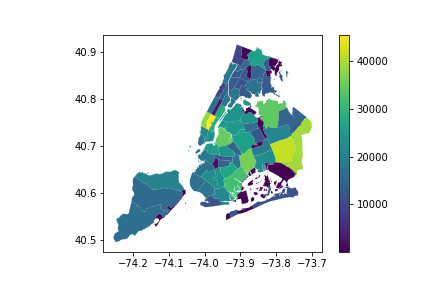

<AxesSubplot:>

In [45]:
mv_collision_geo.plot(column='case_num', legend=True)

In [46]:
mv_collision_geo.to_file('data/mv_collision_geo.geojson')

In [47]:
mv_collision['NUMBER OF PERSONS INJURED'] = mv_collision['NUMBER OF PERSONS INJURED'].astype(float)
mv_collision['NUMBER OF PERSONS KILLED'] = mv_collision['NUMBER OF PERSONS KILLED'].astype(float)

mv_collision_injured_geo = nyc_geo.copy(deep=True)
mv_collision_injured_geo['injured_num'] = 0
mv_collision_injured_geo['killed_num'] = 0
mv_collision_injured_geo['vehicle_num'] = 0
for i, c_row in mv_collision.iterrows():
    for j, g_row in mv_collision_injured_geo.iterrows():
        if g_row.geometry.contains(c_row.geometry):
            mv_collision_injured_geo.at[j,'injured_num'] += 0 if pd.isnull(c_row['NUMBER OF PERSONS INJURED']) else c_row['NUMBER OF PERSONS INJURED']
            mv_collision_injured_geo.at[j,'killed_num'] += 0 if pd.isnull(c_row['NUMBER OF PERSONS KILLED']) else c_row['NUMBER OF PERSONS KILLED']
            mv_collision_injured_geo.at[j,'vehicle_num'] += 0 if pd.isnull(c_row['CONTRIBUTING FACTOR VEHICLE 1']) else 1
            mv_collision_injured_geo.at[j,'vehicle_num'] += 0 if pd.isnull(c_row['CONTRIBUTING FACTOR VEHICLE 2']) else 1
            mv_collision_injured_geo.at[j,'vehicle_num'] += 0 if pd.isnull(c_row['CONTRIBUTING FACTOR VEHICLE 3']) else 1
            mv_collision_injured_geo.at[j,'vehicle_num'] += 0 if pd.isnull(c_row['CONTRIBUTING FACTOR VEHICLE 4']) else 1
            mv_collision_injured_geo.at[j,'vehicle_num'] += 0 if pd.isnull(c_row['CONTRIBUTING FACTOR VEHICLE 5']) else 1
           
            

mv_collision_injured_geo 

,boro_cd,shape_area,shape_leng,geometry,injured_num,killed_num,vehicle_num
0,101,42689119.0133,74168.5878924,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",2848,11,32311
1,102,37689205.9401,34130.5952768,"MULTIPOLYGON (((-73.99684 40.73736, -73.99362 ...",3672,17,40842
2,103,46879779.2986,30695.6409632,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...",5189,19,43663
3,104,49311715.1126,67623.6699012,"MULTIPOLYGON (((-73.99394 40.77318, -73.99370 ...",5208,27,72840
4,105,43790329.8699,35288.1885095,"MULTIPOLYGON (((-73.97301 40.76428, -73.97141 ...",7362,29,86223
...,...,...,...,...,...,...,...
66,502,592715674.432,143044.989836,"MULTIPOLYGON (((-74.07347 40.57839, -74.07345 ...",4138,25,30285
67,503,599053419.389,193564.186317,"MULTIPOLYGON (((-74.13320 40.53631, -74.13301 ...",4170,26,31603
68,595,54734567.3489,110147.254437,"MULTIPOLYGON (((-74.11834 40.55046, -74.11676 ...",92,2,555
69,203,44803080.7253,33500.8967412,"MULTIPOLYGON (((-73.88072 40.83752, -73.88074 ...",3407,9,21326


In [48]:
mv_collision_injured_geo.to_file('data/mv_collision_injured_geo.geojson')

C:\Users\yym12\AppData\Local\Temp/ipykernel_8300/568883684.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  mv_collision_injured_geo.to_file('data/mv_collision_injured_geo.geojson')


<IPython.core.display.Javascript object>


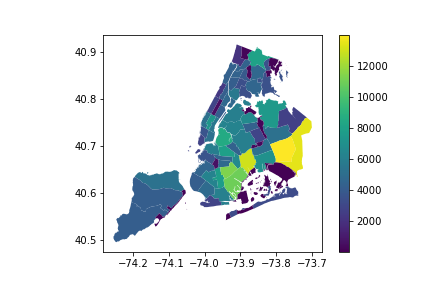

<AxesSubplot:>

In [49]:
mv_collision_injured_geo.plot(column='injured_num', legend=True)

<IPython.core.display.Javascript object>


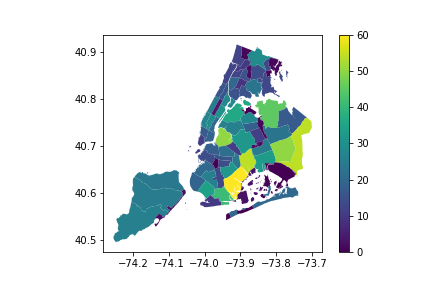

<AxesSubplot:>

In [50]:
mv_collision_injured_geo.plot(column='killed_num', legend=True)

<IPython.core.display.Javascript object>


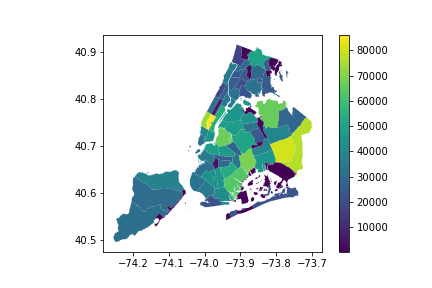

<AxesSubplot:>

In [51]:
mv_collision_injured_geo.plot(column='vehicle_num', legend=True)

In [52]:
mv_collision = mv_collision.rename(columns={'CRASH DATE': 'CRASH_DATE', 'CRASH TIME': 'CRASH_TIME'})
# mv_collision['CRASH DATE'] = pd.to_datetime(mv_collision.CRASH_DATE, format='%Y-%m-%d %H:%M:%S')
mv_collision['CRASH DATE'] = pd.to_datetime(mv_collision.CRASH_DATE, format='%Y-%m-%d')
mv_collision

,Unnamed: 0,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,geometry,CRASH DATE
0,1,2021-04-13 00:00:00,21:35,BROOKLYN,11217,40.683580,-73.976170,"(40.68358, -73.97617)",NaN,NaN,...,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN,POINT (-73.97617 40.68358),2021-04-13
5,13,2019-05-21 00:00:00,22:50,BROOKLYN,11201,40.697540,-73.983120,"(40.69754, -73.98312)",GOLD STREET,CONCORD STREET,...,NaN,NaN,4136992,锟組BU,Taxi,NaN,NaN,NaN,POINT (-73.98312 40.69754),2019-05-21
6,15,2021-02-26 00:00:00,14:50,BRONX,10461,40.843464,-73.836000,"(40.843464, -73.836)",NaN,NaN,...,NaN,NaN,4395664,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,POINT (-73.836 40.843464),2021-02-26
7,17,2021-03-31 00:00:00,22:20,BROOKLYN,11234,40.626457,-73.918000,"(40.626457, -73.918)",RALPH AVENUE,AVENUE K,...,NaN,NaN,4403773,Sedan,Sedan,NaN,NaN,NaN,POINT (-73.91800000000001 40.626457),2021-03-31
8,18,2021-04-06 00:00:00,22:58,STATEN ISLAND,10312,40.526894,-74.167280,"(40.526894, -74.16728)",BARCLAY AVENUE,HYLAN BOULEVARD,...,NaN,NaN,4405244,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,POINT (-74.16728000000001 40.526894),2021-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270722,1850323,2012-07-07 00:00:00,17:35,BROOKLYN,11235,40.575802,-73.961137,"(40.5758019, -73.9611371)",BRIGHTON 6 STREET,BRIGHTWATER COURT,...,NaN,NaN,113584,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,POINT (-73.9611371 40.5758019),2012-07-07
1270723,1850324,2012-07-06 00:00:00,15:09,MANHATTAN,10035,40.801235,-73.941815,"(40.8012354, -73.9418153)",EAST 119 STREET,PARK AVENUE,...,NaN,NaN,59654,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,POINT (-73.9418153 40.8012354),2012-07-06
1270724,1850325,2012-07-03 00:00:00,17:30,QUEENS,11102,40.774711,-73.933386,"(40.7747112, -73.9333863)",27 AVENUE,4 STREET,...,NaN,NaN,272592,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,POINT (-73.9333863 40.7747112),2012-07-03
1270725,1850326,2012-07-01 00:00:00,15:30,BROOKLYN,11236,40.645032,-73.919978,"(40.6450318, -73.9199775)",RALPH AVENUE,CLARENDON ROAD,...,NaN,NaN,135041,SMALL COM VEH(4 TIRES),PASSENGER VEHICLE,NaN,NaN,NaN,POINT (-73.9199775 40.6450318),2012-07-01


In [53]:

df_case_by_date = mv_collision.groupby(mv_collision['CRASH_DATE']).size().reset_index(name='Count')
df_case_by_date = df_case_by_date[(df_case_by_date['CRASH_DATE']> "2020-11-01") & (df_case_by_date['CRASH_DATE']< "2021-12-01")]


In [64]:
# from datetime import datetime
# # Create sample time series with month start frequency, plot it with a pandas bar chart
# # rng = np.random.default_rng(seed=1) # random number generator
# # dti = pd.date_range('12/1/2020', periods=12, freq='M')
# # df = pd.DataFrame(data=df_case_by_date, index=dti)
# # df = pd.DataFrame(data=rng.normal(size=dti.size), index=dti)
# ax = df_case_by_date.plot.bar(figsize=(10,4), legend=None)

# # Set major ticks and tick labels
# ax.set_xticks(range(df_case_by_date.index.size))
# # ax.set_xticklabels([ts.strftime('%b\n%Y') if ts.year != df.index[idx-1].year
# #                     else ts.strftime('%b') for idx, ts in enumerate(df.index)])
# ax.set_xticklabels([datetime.strptime(str(ts), "%Y-%m-%dT%H:%M:%S").strftime('%b\n%Y%m') for idx, ts in enumerate(df_case_by_date.index)])
# ax.figure.autofmt_xdate(rotation=0, ha='center');

In [55]:
df_case_by_time = mv_collision[['CRASH_DATE','CRASH_TIME']]
df_case_by_time['CRASH_TIME'] = pd.to_datetime(df_case_by_time['CRASH_TIME'], format='%H:%M').dt.hour
# df_case_by_time = df_case_by_time[(df_case_by_time['CRASH_DATE']> "2020-11-01") & (df_case_by_time['CRASH_DATE']< "2021-12-01")]

df_case_by_time = df_case_by_date.groupby(df_case_by_time.CRASH_TIME).size().reset_index(name='Count')
df_case_by_time

C:\Users\yym12\AppData\Local\Temp/ipykernel_8300/1529478254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case_by_time['CRASH_TIME'] = pd.to_datetime(df_case_by_time['CRASH_TIME'], format='%H:%M').dt.hour


,CRASH_TIME,Count
0,0.0,20
1,1.0,14
2,2.0,8
3,3.0,6
4,4.0,7
5,5.0,6
6,6.0,7
7,7.0,6
8,8.0,12
9,9.0,11


In [65]:
# from datetime import datetime
# ax = df_case_by_time.plot.bar(figsize=(10,4), legend=None)

# # Set major ticks and tick labels
# ax.set_xticks(range(df_case_by_time.index.size))
# # ax.set_xticklabels([ts.strftime('%b\n%Y') if ts.year != df.index[idx-1].year
# #                     else ts.strftime('%b') for idx, ts in enumerate(df.index)])
# ax.set_xticklabels([str(ts).strftime('%b\n') for idx, ts in enumerate(df_case_by_time.index)])
# ax.figure.autofmt_xdate(rotation=0, ha='center');

In [57]:
df_case_by_reason = mv_collision[['BOROUGH','CONTRIBUTING FACTOR VEHICLE 1']]
df_case_by_reason = df_case_by_reason.rename(columns={'BOROUGH': 'BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1': 'REASON'})
df_case_by_reason = df_case_by_reason.groupby(['BOROUGH', 'REASON']).size().reset_index(name='Count')
df_case_by_reason = df_case_by_reason.groupby(['BOROUGH'])[['REASON','Count']].apply(lambda x: x.nlargest(5, columns=['Count']))
df_case_by_reason

REASON   Count
BOROUGH                                                  
BRONX         55                      Unspecified   78377
              10   Driver Inattention/Distraction   27568
              31                  Other Vehicular    8201
              17    Failure to Yield Right-of-Way    7917
              5                  Backing Unsafely    7758
BROOKLYN      115                     Unspecified  171310
              70   Driver Inattention/Distraction   63536
              77    Failure to Yield Right-of-Way   24929
              65                 Backing Unsafely   15984
              80            Following Too Closely   11977
MANHATTAN     176                     Unspecified   93261
              131  Driver Inattention/Distraction   58049
              152                 Other Vehicular   16793
              138   Failure to Yield Right-of-Way   12893
              173              Turning Improperly   10453
QUEENS        237                     Unspecified  123714
              192  Driver Inattention/Distraction   69629
              199   Failure to Yield Right-of-Way   27535
              187                Backing Unsafely   16761
              202           Following Too Closely   11152
STATEN ISLAND 297                     Unspecified   21548
              253  Driver Inattention/Distraction    9878
              260   Failure to Yield Right-of-Way    3129
              248                Backing Unsafely    2268
              263           Following Too Closely    1901

In [59]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# df_case_by_reason.iloc[[0]]
# df_case_by_reason.loc[gb.groups['foo']]
# df_case_by_reason.get_group('BRONX')
# df_case_by_reason[df_case_by_reason['BOROUGH'] == 'BRONX']
# BRONX_collision_reason = df_case_by_reason[df_case_by_reason['BOROUGH'] == 'BRONX']
# BRONX_collision_reason

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()